In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import math

In [2]:
matches_maps_df = pd.read_csv("VCT_2024_seoul_dataset/detailed_matches_maps.csv")
matches_overview_df = pd.read_csv("VCT_2024_seoul_dataset/detailed_matches_overview.csv")

In [3]:
matches_maps_df.head()

,match_id,map_name,map_order,score,winner,duration,picked_by
0,378662,Haven,1,13 - 8,Gen.G,1:02:40,Sentinels
1,378662,Ascent,2,13 - 7,Gen.G,46:45,Gen.G
2,378663,Abyss,1,12 - 14,Team Heretics,1:10:12,FunPlus Phoenix
3,378663,Bind,2,13 - 9,FunPlus Phoenix,53:01,Team Heretics
4,378663,Lotus,3,13 - 15,Team Heretics,1:07:12,Decider


In [4]:
matches_overview_df.head()

,match_id,match_title,event,date,format,teams,score,maps_played,patch,pick_ban_info
0,378662,Gen.G vs Sentinels,Valorant Champions 2024,2024-08-01 04:00:00,Bo3,Gen.G vs Sentinels,2 - 0,2,Patch 9.02,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...
1,378663,FunPlus Phoenix vs Team Heretics,Valorant Champions 2024,2024-08-01 06:25:00,Bo3,FunPlus Phoenix vs Team Heretics,1 - 2,3,Patch 9.02,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...
2,378657,DRX vs KRÜ Esports,Valorant Champions 2024,2024-08-02 04:00:00,Bo3,DRX vs KRÜ Esports,2 - 1,3,Patch 9.02,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...
3,378656,FNATIC vs Bilibili Gaming,Valorant Champions 2024,2024-08-02 07:00:00,Bo3,FNATIC vs Bilibili Gaming,2 - 0,2,Patch 9.02,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...
4,378667,LEVIATÁN vs TALON,Valorant Champions 2024,2024-08-03 04:00:00,Bo3,LEVIATÁN vs TALON,2 - 0,2,Patch 9.02,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...


In [5]:
matches_overview_df = matches_overview_df.drop(columns=['date', 'patch', 'match_title', 'event'])
matches_overview_df.head()

,match_id,format,teams,score,maps_played,pick_ban_info
0,378662,Bo3,Gen.G vs Sentinels,2 - 0,2,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...
1,378663,Bo3,FunPlus Phoenix vs Team Heretics,1 - 2,3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...
2,378657,Bo3,DRX vs KRÜ Esports,2 - 1,3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...
3,378656,Bo3,FNATIC vs Bilibili Gaming,2 - 0,2,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...
4,378667,Bo3,LEVIATÁN vs TALON,2 - 0,2,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...


In [6]:
matches_overview_df[['team1', 'team2']] = matches_overview_df['teams'].str.split(' vs ', expand = True)
matches_overview_df = matches_overview_df.drop(columns=['teams'])
matches_overview_df.head()

,match_id,format,score,maps_played,pick_ban_info,team1,team2
0,378662,Bo3,2 - 0,2,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...,Gen.G,Sentinels
1,378663,Bo3,1 - 2,3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...,FunPlus Phoenix,Team Heretics
2,378657,Bo3,2 - 1,3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...,DRX,KRÜ Esports
3,378656,Bo3,2 - 0,2,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...,FNATIC,Bilibili Gaming
4,378667,Bo3,2 - 0,2,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...,LEVIATÁN,TALON


In [7]:
# Split the score into two seperate columns for each teams score
matches_overview_df[['team1_score', 'team2_score']] = matches_overview_df['score'].str.split(' - ', expand = True)
# Convert the scores from string to integers
matches_overview_df['team1_score'] = matches_overview_df['team1_score'].astype(int)
matches_overview_df['team2_score'] = matches_overview_df['team2_score'].astype(int)
matches_overview_df['winner']  = np.where(matches_overview_df['team1_score']>matches_overview_df['team2_score'], matches_overview_df['team1'], matches_overview_df['team2'])
matches_overview_df['looser'] = np.where(matches_overview_df['team1_score'] < matches_overview_df['team2_score'], matches_overview_df['team1'], matches_overview_df['team2'])

matches_overview_df = matches_overview_df.drop(columns = ['score'])
matches_overview_df

,match_id,format,maps_played,pick_ban_info,team1,team2,team1_score,team2_score,winner,looser
0,378662,Bo3,2,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...,Gen.G,Sentinels,2,0,Gen.G,Sentinels
1,378663,Bo3,3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...,FunPlus Phoenix,Team Heretics,1,2,Team Heretics,FunPlus Phoenix
2,378657,Bo3,3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...,DRX,KRÜ Esports,2,1,DRX,KRÜ Esports
3,378656,Bo3,2,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...,FNATIC,Bilibili Gaming,2,0,FNATIC,Bilibili Gaming
4,378667,Bo3,2,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...,LEVIATÁN,TALON,2,0,LEVIATÁN,TALON
5,378669,Bo3,3,TE ban Icebox; VIT ban Lotus; TE pick Ascent; ...,Team Vitality,Trace Esports,1,2,Trace Esports,Team Vitality
6,378674,Bo3,2,PRX ban Ascent; G2 ban Sunset; PRX pick Icebox...,G2 Esports,Paper Rex,2,0,G2 Esports,Paper Rex
7,378673,Bo3,2,FUT ban Haven; EDG ban Ascent; FUT pick Lotus;...,EDward Gaming,FUT Esports,2,0,EDward Gaming,FUT Esports
8,378664,Bo3,3,TH ban Ascent; GEN ban Sunset; TH pick Abyss; ...,Gen.G,Team Heretics,1,2,Team Heretics,Gen.G
9,378658,Bo3,2,DRX ban Haven; FNC ban Icebox; DRX pick Abyss;...,FNATIC,DRX,0,2,DRX,FNATIC


In [8]:
# create a DataFrame with pick/ban info, match_id and format
pick_info = matches_overview_df[['match_id', 'format','pick_ban_info']].copy()
pick_info = pick_info.set_index('match_id')

# split the pick_ban_info into separate columns
veto_actions = pick_info['pick_ban_info'].str.split(";", expand=True)

# Dynamically name the columns based on the number of splits
veto_cols = [f'action{i+1}' for i in range(veto_actions.shape[1])]

#Assign the new columns to the original DataFrame
pick_info[veto_cols] = veto_actions


#pick_info[['action1', 'action2', 'action3', 'action4', 'action5', 'action6', 'action7']] = pick_info['pick_ban_info'].str.split(";", expand = True)
pick_info

,format,pick_ban_info,action1,action2,action3,action4,action5,action6,action7
match_id,,,,,,,,,
378662,Bo3,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...,SEN ban Icebox,GEN ban Sunset,SEN pick Haven,GEN pick Ascent,SEN ban Bind,GEN ban Lotus,Abyss remains
378663,Bo3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...,FPX ban Sunset,TH ban Icebox,FPX pick Abyss,TH pick Bind,FPX ban Ascent,TH ban Haven,Lotus remains
378657,Bo3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...,KRÜ ban Icebox,DRX ban Lotus,KRÜ pick Haven,DRX pick Abyss,KRÜ ban Ascent,DRX ban Sunset,Bind remains
378656,Bo3,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...,BLG ban Haven,FNC ban Sunset,BLG pick Bind,FNC pick Lotus,BLG ban Abyss,FNC ban Icebox,Ascent remains
378667,Bo3,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...,TLN ban Icebox,LEV ban Lotus,TLN pick Bind,LEV pick Ascent,TLN ban Haven,LEV ban Abyss,Sunset remains
378669,Bo3,TE ban Icebox; VIT ban Lotus; TE pick Ascent; ...,TE ban Icebox,VIT ban Lotus,TE pick Ascent,VIT pick Sunset,TE ban Abyss,VIT ban Haven,Bind remains
378674,Bo3,PRX ban Ascent; G2 ban Sunset; PRX pick Icebox...,PRX ban Ascent,G2 ban Sunset,PRX pick Icebox,G2 pick Lotus,PRX ban Haven,G2 ban Abyss,Bind remains
378673,Bo3,FUT ban Haven; EDG ban Ascent; FUT pick Lotus;...,FUT ban Haven,EDG ban Ascent,FUT pick Lotus,EDG pick Bind,FUT ban Abyss,EDG ban Icebox,Sunset remains
378664,Bo3,TH ban Ascent; GEN ban Sunset; TH pick Abyss; ...,TH ban Ascent,GEN ban Sunset,TH pick Abyss,GEN pick Lotus,TH ban Icebox,GEN ban Haven,Bind remains


In [9]:
veto_cols

['action1', 'action2', 'action3', 'action4', 'action5', 'action6', 'action7']

In [10]:
veto_split = pd.DataFrame()
for cols in veto_cols:
    print(cols)
    pick_info[cols]= pick_info[cols].astype(str).str.strip().str.split(" ")
    
pick_info

action1
action2
action3
action4
action5
action6
action7


,format,pick_ban_info,action1,action2,action3,action4,action5,action6,action7
match_id,,,,,,,,,
378662,Bo3,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...,"[SEN, ban, Icebox]","[GEN, ban, Sunset]","[SEN, pick, Haven]","[GEN, pick, Ascent]","[SEN, ban, Bind]","[GEN, ban, Lotus]","[Abyss, remains]"
378663,Bo3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...,"[FPX, ban, Sunset]","[TH, ban, Icebox]","[FPX, pick, Abyss]","[TH, pick, Bind]","[FPX, ban, Ascent]","[TH, ban, Haven]","[Lotus, remains]"
378657,Bo3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...,"[KRÜ, ban, Icebox]","[DRX, ban, Lotus]","[KRÜ, pick, Haven]","[DRX, pick, Abyss]","[KRÜ, ban, Ascent]","[DRX, ban, Sunset]","[Bind, remains]"
378656,Bo3,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...,"[BLG, ban, Haven]","[FNC, ban, Sunset]","[BLG, pick, Bind]","[FNC, pick, Lotus]","[BLG, ban, Abyss]","[FNC, ban, Icebox]","[Ascent, remains]"
378667,Bo3,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...,"[TLN, ban, Icebox]","[LEV, ban, Lotus]","[TLN, pick, Bind]","[LEV, pick, Ascent]","[TLN, ban, Haven]","[LEV, ban, Abyss]","[Sunset, remains]"
378669,Bo3,TE ban Icebox; VIT ban Lotus; TE pick Ascent; ...,"[TE, ban, Icebox]","[VIT, ban, Lotus]","[TE, pick, Ascent]","[VIT, pick, Sunset]","[TE, ban, Abyss]","[VIT, ban, Haven]","[Bind, remains]"
378674,Bo3,PRX ban Ascent; G2 ban Sunset; PRX pick Icebox...,"[PRX, ban, Ascent]","[G2, ban, Sunset]","[PRX, pick, Icebox]","[G2, pick, Lotus]","[PRX, ban, Haven]","[G2, ban, Abyss]","[Bind, remains]"
378673,Bo3,FUT ban Haven; EDG ban Ascent; FUT pick Lotus;...,"[FUT, ban, Haven]","[EDG, ban, Ascent]","[FUT, pick, Lotus]","[EDG, pick, Bind]","[FUT, ban, Abyss]","[EDG, ban, Icebox]","[Sunset, remains]"
378664,Bo3,TH ban Ascent; GEN ban Sunset; TH pick Abyss; ...,"[TH, ban, Ascent]","[GEN, ban, Sunset]","[TH, pick, Abyss]","[GEN, pick, Lotus]","[TH, ban, Icebox]","[GEN, ban, Haven]","[Bind, remains]"


In [11]:
# Restructure the pick_info DataFrame to have clear columns for each pick/ban action based on the match format (Bo3 or Bo5)
# [match_id, team1, team2, team1_ban1, team2_ban1, team1_pick1, team2_pick1, team1_ban2, team2_ban2, team1_pick2, team2_pick2, decider]     

for idx , row in pick_info.iterrows():
    
    # For Bo3 Matches
    if row['format'] == 'Bo3':
        pick_info.loc[idx,'team1'] = row['action1'][0]
        pick_info.loc[idx,'team2'] = row['action2'][0]

        pick_info.loc[idx,'team1_ban1'] = row['action1'][2]
        pick_info.loc[idx,'team2_ban1'] = row['action2'][2]
        pick_info.loc[idx,'team1_pick1'] = row['action3'][2]
        pick_info.loc[idx,'team2_pick1'] = row['action4'][2]
        pick_info.loc[idx,'team1_ban2'] = row['action5'][2]
        pick_info.loc[idx,'team2_ban2'] = row['action6'][2]
        pick_info.loc[idx,'team1_pick2'] = 'Not Valid for Bo3'
        pick_info.loc[idx,'team2_pick2'] = 'Not Valid for Bo3'
        pick_info.loc[idx,'decider'] = row['action7'][0]

    # For Bo5 Matches with each team getting 1 ban (lower grand final scenario)
    elif row['format'] == 'Bo5' and row['action1'][0] != row['action2'][0]:
        pick_info.loc[idx,'team1'] = row['action1'][0]
        pick_info.loc[idx,'team2'] = row['action2'][0]
        
        pick_info.loc[idx,'team1_ban1'] = row['action1'][2]
        pick_info.loc[idx,'team2_ban1'] = row['action2'][2]
        pick_info.loc[idx,'team1_pick1'] = row['action3'][2]
        pick_info.loc[idx,'team2_pick1'] = row['action4'][2]
        pick_info.loc[idx,'team1_ban2'] = 'NA for lower final Bo5'
        pick_info.loc[idx,'team2_ban2'] = 'NA for lower final Bo5'
        pick_info.loc[idx,'team1_pick2'] = row['action5'][2]
        pick_info.loc[idx,'team2_pick2'] = row['action6'][2]
        pick_info.loc[idx,'decider'] = row['action7'][0]

    # For Bo5 Matches with top seed team gets 2 ban (grand final scenario)
    elif row['format'] == 'Bo5' and row['action1'][0] == row['action2'][0]:
        pick_info.loc[idx,'team1'] = row['action1'][0]
        pick_info.loc[idx,'team2'] = row['action4'][0]
        
        pick_info.loc[idx,'team1_ban1'] = row['action1'][2]
        pick_info.loc[idx,'team2_ban1'] = 'NA for grand final Bo5'
        pick_info.loc[idx,'team1_pick1'] = row['action3'][2]
        pick_info.loc[idx,'team2_pick1'] = row['action4'][2]
        pick_info.loc[idx,'team1_ban2'] = row['action2'][2]
        pick_info.loc[idx,'team2_ban2'] = 'NA for grand final Bo5'
        pick_info.loc[idx,'team1_pick2'] = row['action5'][2]
        pick_info.loc[idx,'team2_pick2'] = row['action6'][2]
        pick_info.loc[idx,'decider'] = row['action7'][0]
      

pick_info

,format,pick_ban_info,action1,action2,action3,action4,action5,action6,action7,team1,team2,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider
match_id,,,,,,,,,,,,,,,,,,,,
378662,Bo3,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...,"[SEN, ban, Icebox]","[GEN, ban, Sunset]","[SEN, pick, Haven]","[GEN, pick, Ascent]","[SEN, ban, Bind]","[GEN, ban, Lotus]","[Abyss, remains]",SEN,GEN,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss
378663,Bo3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...,"[FPX, ban, Sunset]","[TH, ban, Icebox]","[FPX, pick, Abyss]","[TH, pick, Bind]","[FPX, ban, Ascent]","[TH, ban, Haven]","[Lotus, remains]",FPX,TH,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus
378657,Bo3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...,"[KRÜ, ban, Icebox]","[DRX, ban, Lotus]","[KRÜ, pick, Haven]","[DRX, pick, Abyss]","[KRÜ, ban, Ascent]","[DRX, ban, Sunset]","[Bind, remains]",KRÜ,DRX,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind
378656,Bo3,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...,"[BLG, ban, Haven]","[FNC, ban, Sunset]","[BLG, pick, Bind]","[FNC, pick, Lotus]","[BLG, ban, Abyss]","[FNC, ban, Icebox]","[Ascent, remains]",BLG,FNC,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent
378667,Bo3,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...,"[TLN, ban, Icebox]","[LEV, ban, Lotus]","[TLN, pick, Bind]","[LEV, pick, Ascent]","[TLN, ban, Haven]","[LEV, ban, Abyss]","[Sunset, remains]",TLN,LEV,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset
378669,Bo3,TE ban Icebox; VIT ban Lotus; TE pick Ascent; ...,"[TE, ban, Icebox]","[VIT, ban, Lotus]","[TE, pick, Ascent]","[VIT, pick, Sunset]","[TE, ban, Abyss]","[VIT, ban, Haven]","[Bind, remains]",TE,VIT,Icebox,Lotus,Ascent,Sunset,Abyss,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
378674,Bo3,PRX ban Ascent; G2 ban Sunset; PRX pick Icebox...,"[PRX, ban, Ascent]","[G2, ban, Sunset]","[PRX, pick, Icebox]","[G2, pick, Lotus]","[PRX, ban, Haven]","[G2, ban, Abyss]","[Bind, remains]",PRX,G2,Ascent,Sunset,Icebox,Lotus,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Bind
378673,Bo3,FUT ban Haven; EDG ban Ascent; FUT pick Lotus;...,"[FUT, ban, Haven]","[EDG, ban, Ascent]","[FUT, pick, Lotus]","[EDG, pick, Bind]","[FUT, ban, Abyss]","[EDG, ban, Icebox]","[Sunset, remains]",FUT,EDG,Haven,Ascent,Lotus,Bind,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Sunset
378664,Bo3,TH ban Ascent; GEN ban Sunset; TH pick Abyss; ...,"[TH, ban, Ascent]","[GEN, ban, Sunset]","[TH, pick, Abyss]","[GEN, pick, Lotus]","[TH, ban, Icebox]","[GEN, ban, Haven]","[Bind, remains]",TH,GEN,Ascent,Sunset,Abyss,Lotus,Icebox,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind


In [12]:
pick_info.drop(columns = ['pick_ban_info', 'format'] + veto_cols, inplace = True)
pick_info

,team1,team2,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider
match_id,,,,,,,,,,,
378662,SEN,GEN,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss
378663,FPX,TH,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus
378657,KRÜ,DRX,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind
378656,BLG,FNC,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent
378667,TLN,LEV,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset
378669,TE,VIT,Icebox,Lotus,Ascent,Sunset,Abyss,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
378674,PRX,G2,Ascent,Sunset,Icebox,Lotus,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Bind
378673,FUT,EDG,Haven,Ascent,Lotus,Bind,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Sunset
378664,TH,GEN,Ascent,Sunset,Abyss,Lotus,Icebox,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind


In [13]:
matches_overview_df = pd.merge(matches_overview_df,pick_info, left_on = 'match_id', right_on = 'match_id', how = 'left')
matches_overview_df

,match_id,format,maps_played,pick_ban_info,team1_x,team2_x,team1_score,team2_score,winner,looser,...,team2_y,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider
0,378662,Bo3,2,SEN ban Icebox; GEN ban Sunset; SEN pick Haven...,Gen.G,Sentinels,2,0,Gen.G,Sentinels,...,GEN,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss
1,378663,Bo3,3,FPX ban Sunset; TH ban Icebox; FPX pick Abyss;...,FunPlus Phoenix,Team Heretics,1,2,Team Heretics,FunPlus Phoenix,...,TH,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus
2,378657,Bo3,3,KRÜ ban Icebox; DRX ban Lotus; KRÜ pick Haven;...,DRX,KRÜ Esports,2,1,DRX,KRÜ Esports,...,DRX,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind
3,378656,Bo3,2,BLG ban Haven; FNC ban Sunset; BLG pick Bind; ...,FNATIC,Bilibili Gaming,2,0,FNATIC,Bilibili Gaming,...,FNC,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent
4,378667,Bo3,2,TLN ban Icebox; LEV ban Lotus; TLN pick Bind; ...,LEVIATÁN,TALON,2,0,LEVIATÁN,TALON,...,LEV,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset
5,378669,Bo3,3,TE ban Icebox; VIT ban Lotus; TE pick Ascent; ...,Team Vitality,Trace Esports,1,2,Trace Esports,Team Vitality,...,VIT,Icebox,Lotus,Ascent,Sunset,Abyss,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
6,378674,Bo3,2,PRX ban Ascent; G2 ban Sunset; PRX pick Icebox...,G2 Esports,Paper Rex,2,0,G2 Esports,Paper Rex,...,G2,Ascent,Sunset,Icebox,Lotus,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Bind
7,378673,Bo3,2,FUT ban Haven; EDG ban Ascent; FUT pick Lotus;...,EDward Gaming,FUT Esports,2,0,EDward Gaming,FUT Esports,...,EDG,Haven,Ascent,Lotus,Bind,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Sunset
8,378664,Bo3,3,TH ban Ascent; GEN ban Sunset; TH pick Abyss; ...,Gen.G,Team Heretics,1,2,Team Heretics,Gen.G,...,GEN,Ascent,Sunset,Abyss,Lotus,Icebox,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
9,378658,Bo3,2,DRX ban Haven; FNC ban Icebox; DRX pick Abyss;...,FNATIC,DRX,0,2,DRX,FNATIC,...,FNC,Haven,Icebox,Abyss,Lotus,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind


In [14]:
unique_teams = pd.unique(matches_overview_df[['team1_x', 'team2_x']].values.ravel())
unique_teams

array(['Gen.G', 'Sentinels', 'FunPlus Phoenix', 'Team Heretics', 'DRX',
       'KRÜ Esports', 'FNATIC', 'Bilibili Gaming', 'LEVIATÁN', 'TALON',
       'Team Vitality', 'Trace Esports', 'G2 Esports', 'Paper Rex',
       'EDward Gaming', 'FUT Esports'], dtype=object)

In [15]:
unq_team = pd.unique(matches_overview_df[['team1_y', 'team2_y']].values.ravel())
unq_team

array(['SEN', 'GEN', 'FPX', 'TH', 'KRÜ', 'DRX', 'BLG', 'FNC', 'TLN',
       'LEV', 'TE', 'VIT', 'PRX', 'G2', 'FUT', 'EDG'], dtype=object)

In [16]:
team_name_map = {
    'GEN': 'Gen.G',
    'SEN': 'Sentinels',
    'FPX': 'FunPlus Phoenix',
    'TH': 'Team Heretics',
    'DRX': 'DRX',
    'KRÜ': 'KRÜ Esports',
    'FNC': 'FNATIC',
    'BLG': 'Bilibili Gaming',
    'LEV': 'LEVIATÁN',
    'TLN': 'TALON',
    'VIT': 'Team Vitality',
    'TE': 'Trace Esports',
    'G2': 'G2 Esports',
    'PRX': 'Paper Rex',
    'EDG': 'EDward Gaming',
    'FUT': 'FUT Esports'
}

In [17]:
matches_overview_df['team1_x'] = matches_overview_df['team1_y'].map(team_name_map)
matches_overview_df['team2_x'] = matches_overview_df['team2_y'].map(team_name_map)
matches_overview_df.drop(columns = ['pick_ban_info','team1_y','team2_y'], inplace = True)
matches_overview_df

,match_id,format,maps_played,team1_x,team2_x,team1_score,team2_score,winner,looser,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider
0,378662,Bo3,2,Sentinels,Gen.G,2,0,Gen.G,Sentinels,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss
1,378663,Bo3,3,FunPlus Phoenix,Team Heretics,1,2,Team Heretics,FunPlus Phoenix,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus
2,378657,Bo3,3,KRÜ Esports,DRX,2,1,DRX,KRÜ Esports,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind
3,378656,Bo3,2,Bilibili Gaming,FNATIC,2,0,FNATIC,Bilibili Gaming,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent
4,378667,Bo3,2,TALON,LEVIATÁN,2,0,LEVIATÁN,TALON,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset
5,378669,Bo3,3,Trace Esports,Team Vitality,1,2,Trace Esports,Team Vitality,Icebox,Lotus,Ascent,Sunset,Abyss,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
6,378674,Bo3,2,Paper Rex,G2 Esports,2,0,G2 Esports,Paper Rex,Ascent,Sunset,Icebox,Lotus,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Bind
7,378673,Bo3,2,FUT Esports,EDward Gaming,2,0,EDward Gaming,FUT Esports,Haven,Ascent,Lotus,Bind,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Sunset
8,378664,Bo3,3,Team Heretics,Gen.G,1,2,Team Heretics,Gen.G,Ascent,Sunset,Abyss,Lotus,Icebox,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
9,378658,Bo3,2,DRX,FNATIC,0,2,DRX,FNATIC,Haven,Icebox,Abyss,Lotus,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind


In [18]:
matches_overview_df = matches_overview_df.rename(columns = {'team1_x' : 'team1', 'team2_x' : 'team2'})
matches_overview_df.columns = [c.strip() for c in matches_overview_df.columns]
matches_overview_df

,match_id,format,maps_played,team1,team2,team1_score,team2_score,winner,looser,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider
0,378662,Bo3,2,Sentinels,Gen.G,2,0,Gen.G,Sentinels,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss
1,378663,Bo3,3,FunPlus Phoenix,Team Heretics,1,2,Team Heretics,FunPlus Phoenix,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus
2,378657,Bo3,3,KRÜ Esports,DRX,2,1,DRX,KRÜ Esports,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind
3,378656,Bo3,2,Bilibili Gaming,FNATIC,2,0,FNATIC,Bilibili Gaming,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent
4,378667,Bo3,2,TALON,LEVIATÁN,2,0,LEVIATÁN,TALON,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset
5,378669,Bo3,3,Trace Esports,Team Vitality,1,2,Trace Esports,Team Vitality,Icebox,Lotus,Ascent,Sunset,Abyss,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
6,378674,Bo3,2,Paper Rex,G2 Esports,2,0,G2 Esports,Paper Rex,Ascent,Sunset,Icebox,Lotus,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Bind
7,378673,Bo3,2,FUT Esports,EDward Gaming,2,0,EDward Gaming,FUT Esports,Haven,Ascent,Lotus,Bind,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Sunset
8,378664,Bo3,3,Team Heretics,Gen.G,1,2,Team Heretics,Gen.G,Ascent,Sunset,Abyss,Lotus,Icebox,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind
9,378658,Bo3,2,DRX,FNATIC,0,2,DRX,FNATIC,Haven,Icebox,Abyss,Lotus,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind


In [19]:
matches_overview_df.to_csv("VCT_2024_seoul_dataset/detailed_matches_overview_processed.csv", index = False)

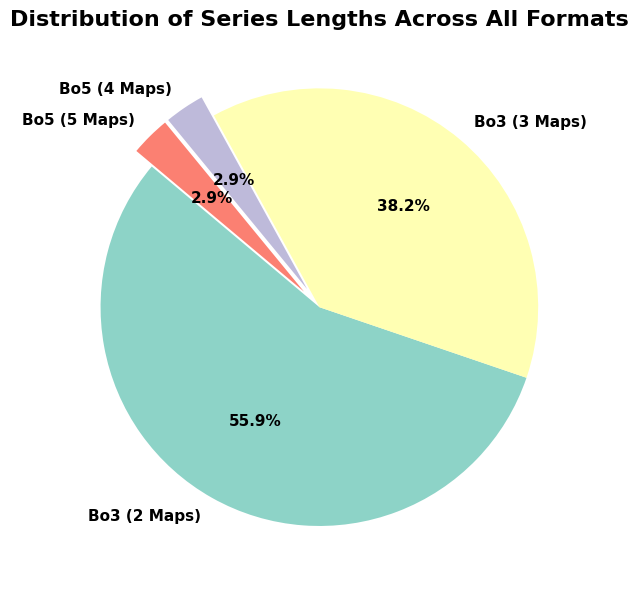

In [20]:
# Distribution of maps played per series ( All formats)

# Create a label combining 'format' and 'maps_played'
# creates categories like "Bo3 (2 Maps)" or "Bo5 (5 Maps)"
matches_overview_df['series_category'] = matches_overview_df['format'] + " (" + matches_overview_df['maps_played'].astype(str) + " Maps)"

# Get the frequency of each category
distribution = matches_overview_df['series_category'].value_counts()

# 4. Generate the Pie Chart
plt.figure(figsize=(6,6))
colors = plt.cm.Set3.colors
# Explode Bo5 categories slightly to make them more visible (slightly highlights BO5 by moving the section outword )
explode = [0.1 if 'Bo5' in label else 0 for label in distribution.index]

plt.pie(
    distribution, 
    labels=distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'weight': 'bold', 'size': 11}
)

plt.title('Distribution of Series Lengths Across All Formats', weight='bold', size=16)
plt.axis('equal') 
plt.tight_layout()
plt.show()


In [21]:
# map pick & ban frequency for Bo3
df_bo3 = matches_overview_df[matches_overview_df['format'] == 'Bo3'] 

counts = pd.DataFrame({
    "Team_1_ban1" : df_bo3['team1_ban1'].value_counts(),
    "Team_2_ban1" : df_bo3['team2_ban1'].value_counts(),
    "Team_1_pick" :(df_bo3['team1_pick1']).value_counts(),
    "Team_2_pick" : (df_bo3['team2_pick1']).value_counts(),
    "Team_1_ban2" : df_bo3['team1_ban2'].value_counts(),
    "Team_2_ban2" : df_bo3['team2_ban2'].value_counts(),
    "Decider" : (df_bo3['decider']).value_counts()}).fillna(0).astype(int)

counts

,Team_1_ban1,Team_2_ban1,Team_1_pick,Team_2_pick,Team_1_ban2,Team_2_ban2,Decider
Abyss,0,2,4,4,10,8,4
Ascent,4,9,1,2,6,7,3
Bind,8,1,5,5,4,2,7
Haven,5,2,5,3,6,7,4
Icebox,11,5,7,3,1,3,2
Lotus,0,6,6,8,4,1,7
Sunset,4,7,4,7,1,4,5


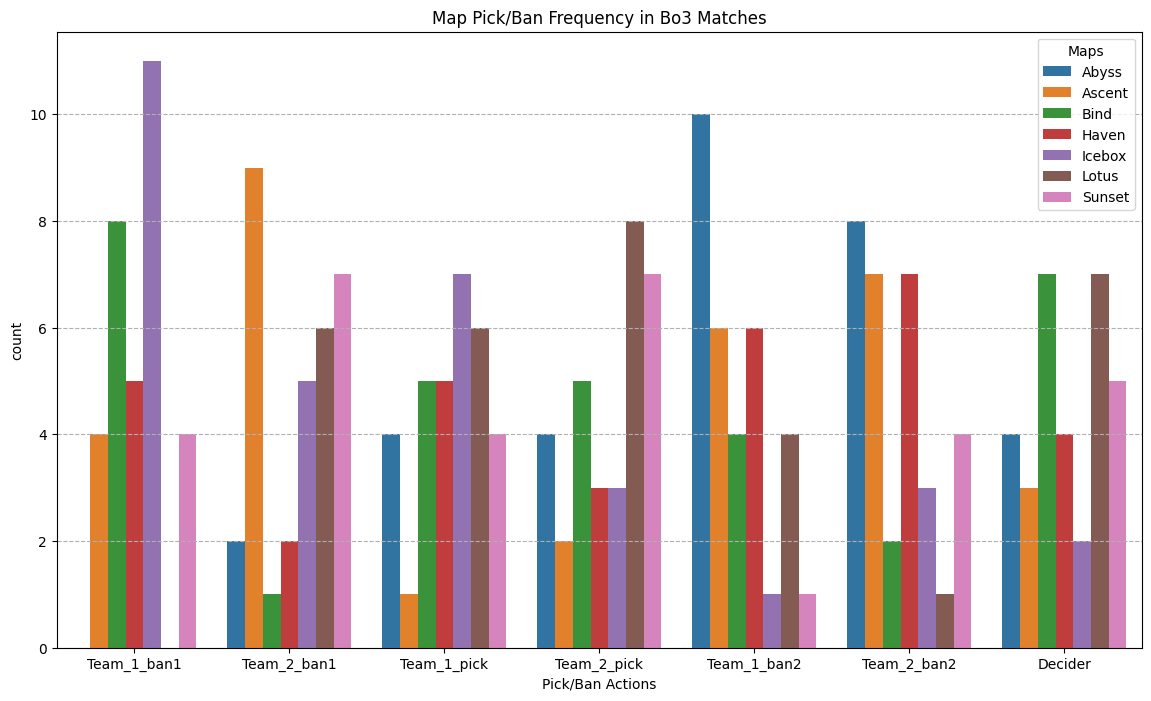

In [22]:
counts_long = counts.reset_index().melt(id_vars = 'index', var_name = 'action', value_name = 'count').rename(columns = {'index':'Maps'})

plt.figure(figsize=(14, 8))
sns.barplot(x = 'action', y = 'count', hue = 'Maps', data = counts_long )
plt.title("Map Pick/Ban Frequency in Bo3 Matches")
plt.xlabel("Pick/Ban Actions")
plt.grid(True,linestyle='--', axis='y' )
plt.show()

In [23]:
# Calculate matches played by each team
team1_col = df_bo3[['team1']].rename(columns={'team1': 'team'})
team2_col = df_bo3[['team2']].rename(columns = {'team2':'team'})
teams = pd.concat((team1_col, team2_col))
df_matches_played = teams.groupby('team').size().reset_index(name ='matches played')
df_matches_played.set_index('team', inplace = True)
df_matches_played

,matches played
team,
Bilibili Gaming,2
DRX,5
EDward Gaming,6
FNATIC,6
FUT Esports,2
FunPlus Phoenix,2
G2 Esports,4
Gen.G,3
KRÜ Esports,3


In [24]:
#most banned map for each team
df_team1_bans = df_bo3[['team1', 'team1_ban1','team1_ban2']].copy()
df_team1_long = pd.melt(
    df_team1_bans,
    id_vars = ['team1'],
    value_vars=['team1_ban1', 'team1_ban2'],
    var_name = 'ban_type',
    value_name = 'map'
).rename(columns = {'team1':'team'})

df_team2_bans =df_bo3[['team2', 'team2_ban1', 'team2_ban2']].copy()
df_team2_long = pd.melt(
    df_team2_bans,
    id_vars = ['team2'],
    value_vars = ['team2_ban1', 'team2_ban2'],
    var_name = 'ban_type',
    value_name = 'map'
).rename(columns = {'team2':'team'})

df_team_bans = pd.concat([df_team1_long, df_team2_long], ignore_index= True) # By default, pandas keeps the original row indices from each DataFrame
#ignore_index=True resets the index in the new DataFrame without duplicating or preserving the old indices.


In [25]:
df_team1_long

,team,ban_type,map
0,Sentinels,team1_ban1,Icebox
1,FunPlus Phoenix,team1_ban1,Sunset
2,KRÜ Esports,team1_ban1,Icebox
3,Bilibili Gaming,team1_ban1,Haven
4,TALON,team1_ban1,Icebox
...,...,...,...
59,LEVIATÁN,team1_ban2,Abyss
60,Sentinels,team1_ban2,Abyss
61,DRX,team1_ban2,Lotus
62,LEVIATÁN,team1_ban2,Haven


In [26]:
df_team2_long

,team,ban_type,map
0,Gen.G,team2_ban1,Sunset
1,Team Heretics,team2_ban1,Icebox
2,DRX,team2_ban1,Lotus
3,FNATIC,team2_ban1,Sunset
4,LEVIATÁN,team2_ban1,Lotus
...,...,...,...
59,Team Heretics,team2_ban2,Sunset
60,FNATIC,team2_ban2,Ascent
61,Team Heretics,team2_ban2,Haven
62,EDward Gaming,team2_ban2,Sunset


In [27]:
df_team_bans

,team,ban_type,map
0,Sentinels,team1_ban1,Icebox
1,FunPlus Phoenix,team1_ban1,Sunset
2,KRÜ Esports,team1_ban1,Icebox
3,Bilibili Gaming,team1_ban1,Haven
4,TALON,team1_ban1,Icebox
...,...,...,...
123,Team Heretics,team2_ban2,Sunset
124,FNATIC,team2_ban2,Ascent
125,Team Heretics,team2_ban2,Haven
126,EDward Gaming,team2_ban2,Sunset


In [28]:
# Clean the map names and ban stages
df_team_bans['ban_stage'] = df_team_bans['ban_type'].apply(
    lambda x : 'Ban' if x =='team1_ban1' or x == 'team2_ban1' or x == 'team1_ban2' or x == 'team2_ban2' else "other"
)
df_team_bans.drop(columns = ['ban_type'], inplace = True)

# Calculate the most banned map for each team
most_banned_maps = df_team_bans.groupby(['team', 'map']).size().reset_index(name='ban_count')
most_banned_maps = most_banned_maps.sort_values(['team', 'ban_count'], ascending=[True, False])

#pivot the dataframe to get the maps as cols and teams as index
df_banned_maps = most_banned_maps.pivot_table(index = 'team', columns = 'map', values = 'ban_count', fill_value = 0)

# Calculate the ban rate for each map by dividing ban counts by total matches played
df_banned_maps = df_banned_maps.div(df_matches_played['matches played'], axis=0)
df_banned_maps = df_banned_maps.round(2)

# Add matches played  column to the banned maps dataframe
df_banned_maps= df_banned_maps.join(df_matches_played)

df_banned_maps

,Abyss,Ascent,Bind,Haven,Icebox,Lotus,Sunset,matches played
team,,,,,,,,
Bilibili Gaming,0.50,0.50,0.00,1.00,0.00,0.00,0.00,2
DRX,0.20,0.40,0.20,0.40,0.00,0.60,0.20,5
EDward Gaming,0.33,1.00,0.17,0.00,0.33,0.00,0.17,6
FNATIC,0.17,0.33,0.00,0.00,1.00,0.00,0.50,6
FUT Esports,1.00,0.00,0.00,1.00,0.00,0.00,0.00,2
FunPlus Phoenix,0.00,0.50,0.00,0.50,0.00,0.00,1.00,2
G2 Esports,0.25,0.50,0.00,0.00,0.00,0.25,1.00,4
Gen.G,0.00,0.00,0.33,0.33,0.00,0.33,1.00,3
KRÜ Esports,0.67,0.33,0.67,0.00,0.33,0.00,0.00,3


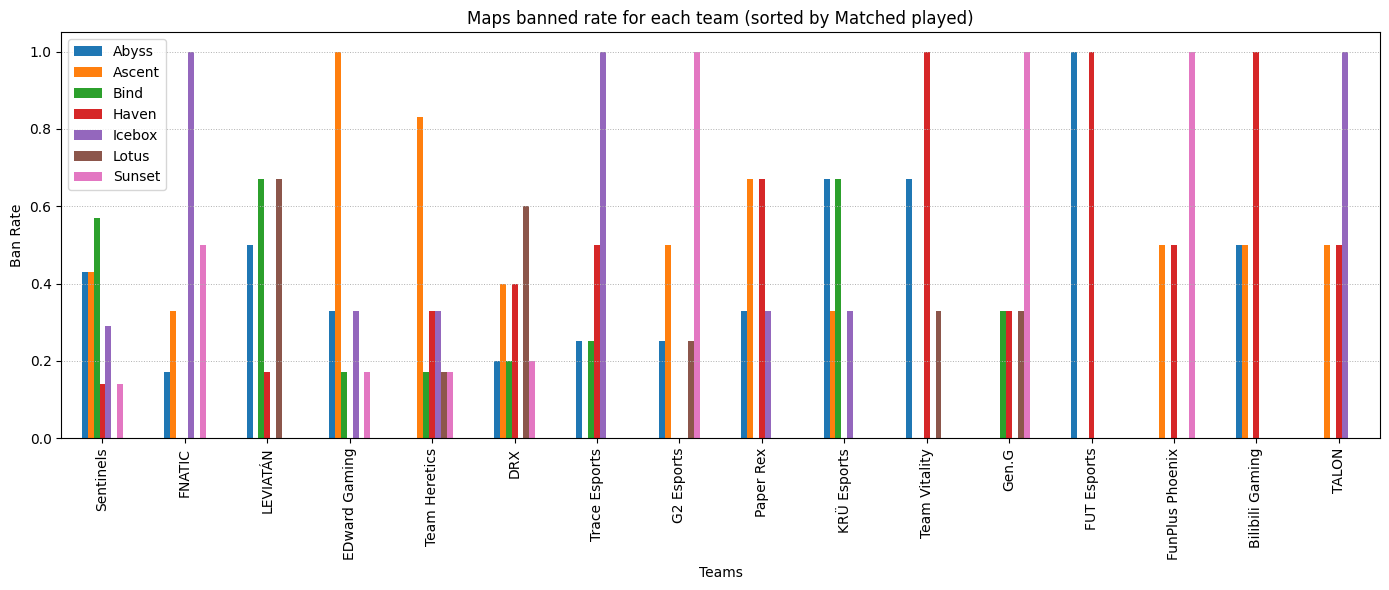

In [29]:
df_banned_maps= df_banned_maps.sort_values( by = 'matches played', ascending = False)
map_cols = [cols for cols in df_banned_maps.columns if cols != 'matches played']

df_banned_maps[map_cols].plot(kind = 'bar', figsize = (14, 6))
plt.title("Maps banned rate for each team (sorted by Matched played)")
plt.ylabel("Ban Rate")
plt.xlabel("Teams")

plt.grid(axis = 'y', linestyle = ':', linewidth = 0.7)
plt.tight_layout()
plt.show()


In [30]:
df_bo3.head()

,match_id,format,maps_played,team1,team2,team1_score,team2_score,winner,looser,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider,series_category
0,378662,Bo3,2,Sentinels,Gen.G,2,0,Gen.G,Sentinels,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss,Bo3 (2 Maps)
1,378663,Bo3,3,FunPlus Phoenix,Team Heretics,1,2,Team Heretics,FunPlus Phoenix,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus,Bo3 (3 Maps)
2,378657,Bo3,3,KRÜ Esports,DRX,2,1,DRX,KRÜ Esports,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind,Bo3 (3 Maps)
3,378656,Bo3,2,Bilibili Gaming,FNATIC,2,0,FNATIC,Bilibili Gaming,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent,Bo3 (2 Maps)
4,378667,Bo3,2,TALON,LEVIATÁN,2,0,LEVIATÁN,TALON,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset,Bo3 (2 Maps)


In [31]:
# seperate the picks and decider for each team into long format
df_team1_picks = df_bo3[['team1', 'team1_pick1', 'decider']].copy()

df_team1_picks_long = pd.melt(
    df_team1_picks,
    id_vars = ['team1', 'decider'],
    value_vars= ['team1_pick1'],
    var_name = 'pick_type',
    value_name ='picked_map'
).rename(columns = {'team1':'team'})

df_team2_picks = df_bo3[['team2','team2_pick1','decider']].copy()
df_team2_picks_long  = pd.melt(
    df_team2_picks,
    id_vars = ['team2','decider'],
    value_vars = 'team2_pick1',
    var_name = 'pick_type',
    value_name = 'picked_map'
).rename(columns = {'team2':'team'})
df_team2_picks_long

df_team_picks = pd.concat([df_team1_picks_long,df_team2_picks_long], ignore_index = True)
df_team_picks

,team,decider,pick_type,picked_map
0,Sentinels,Abyss,team1_pick1,Haven
1,FunPlus Phoenix,Lotus,team1_pick1,Abyss
2,KRÜ Esports,Bind,team1_pick1,Haven
3,Bilibili Gaming,Ascent,team1_pick1,Bind
4,TALON,Sunset,team1_pick1,Bind
...,...,...,...,...
59,Team Heretics,Haven,team2_pick1,Lotus
60,FNATIC,Lotus,team2_pick1,Bind
61,Team Heretics,Icebox,team2_pick1,Sunset
62,EDward Gaming,Abyss,team2_pick1,Lotus


In [32]:
# drop the pick_type column
df_team_picks.drop(columns = ['pick_type'], inplace = True)

# Count the maps picked by each team
picks_count = df_team_picks.groupby(['team','picked_map']).size().reset_index(name = 'pick_count')
picks_count = picks_count.rename(columns = {'picked_map':'map'})


# count the decider map for each team
decider_count = df_team_picks.groupby(['team','decider']).size().reset_index(name = 'decider_count')
decider_count = decider_count.rename(columns = {'decider':'map'})

# merge the pick_count and decider_count dataframes
df_counts = pd.merge(picks_count,decider_count, on = ['team','map'], how = 'outer').fillna(0)

#convert the counts to integer
df_counts['pick_count']= df_counts['pick_count'].astype(int)
df_counts['decider_count'] = df_counts['decider_count'].astype(int)


# pivot the dataframe to get pick rate and decider rate separately
df_pick_rate = df_counts.copy()
df_pick_rate = df_pick_rate.drop(columns = [ 'decider_count'])

df_map_picks = df_pick_rate.pivot_table(index = 'team',columns = 'map', values = 'pick_count', fill_value = 0)
df_map_picks = df_map_picks.join(df_matches_played)
df_map_picks = df_map_picks.sort_values(by = 'matches played',ascending = False)
df_map_picks = df_map_picks.div(df_map_picks['matches played'], axis=0)
df_map_picks = df_map_picks.round(2)
df_map_picks = df_map_picks.drop(columns = ['matches played'])

df_decider_rate = df_counts.copy()
df_decider_rate = df_decider_rate.drop(columns = ['pick_count'])
df_map_deciders = df_decider_rate.pivot_table(index = 'team', columns = 'map', values = 'decider_count', fill_value = 0)
df_map_deciders = df_map_deciders.join(df_matches_played)
df_map_deciders = df_map_deciders.sort_values(by = 'matches played', ascending = False)
df_map_deciders = df_map_deciders.div(df_map_deciders['matches played'], axis=0) 
df_map_deciders = df_map_deciders.round(2)
df_map_deciders = df_map_deciders.drop(columns = ['matches played'])


In [33]:
df_pick_rate

,team,map,pick_count
0,Bilibili Gaming,Ascent,0
1,Bilibili Gaming,Bind,1
2,Bilibili Gaming,Icebox,1
3,Bilibili Gaming,Sunset,0
4,DRX,Abyss,4
...,...,...,...
64,Team Vitality,Sunset,3
65,Trace Esports,Ascent,1
66,Trace Esports,Bind,2
67,Trace Esports,Lotus,1


In [34]:
df_map_picks

,Abyss,Ascent,Bind,Haven,Icebox,Lotus,Sunset
team,,,,,,,
Sentinels,0.00,0.00,0.00,0.29,0.00,0.43,0.29
FNATIC,0.00,0.00,0.17,0.33,0.00,0.50,0.00
LEVIATÁN,0.00,0.17,0.00,0.00,0.67,0.00,0.17
EDward Gaming,0.00,0.00,0.17,0.33,0.17,0.17,0.17
Team Heretics,0.33,0.00,0.17,0.00,0.17,0.17,0.17
DRX,0.80,0.00,0.00,0.20,0.00,0.00,0.00
Trace Esports,0.00,0.25,0.50,0.00,0.00,0.25,0.00
G2 Esports,0.25,0.00,0.25,0.00,0.25,0.25,0.00
Paper Rex,0.00,0.00,0.33,0.00,0.33,0.00,0.33


In [35]:
df_map_deciders

,Abyss,Ascent,Bind,Haven,Icebox,Lotus,Sunset
team,,,,,,,
Sentinels,0.43,0.00,0.00,0.14,0.14,0.14,0.14
FNATIC,0.00,0.17,0.17,0.17,0.00,0.50,0.00
LEVIATÁN,0.17,0.33,0.00,0.33,0.00,0.00,0.17
EDward Gaming,0.17,0.00,0.17,0.00,0.00,0.33,0.33
Team Heretics,0.17,0.00,0.17,0.33,0.17,0.17,0.00
DRX,0.00,0.00,0.40,0.00,0.40,0.00,0.20
Trace Esports,0.00,0.25,0.25,0.00,0.00,0.25,0.25
G2 Esports,0.00,0.00,0.50,0.25,0.00,0.25,0.00
Paper Rex,0.00,0.00,0.33,0.00,0.00,0.67,0.00


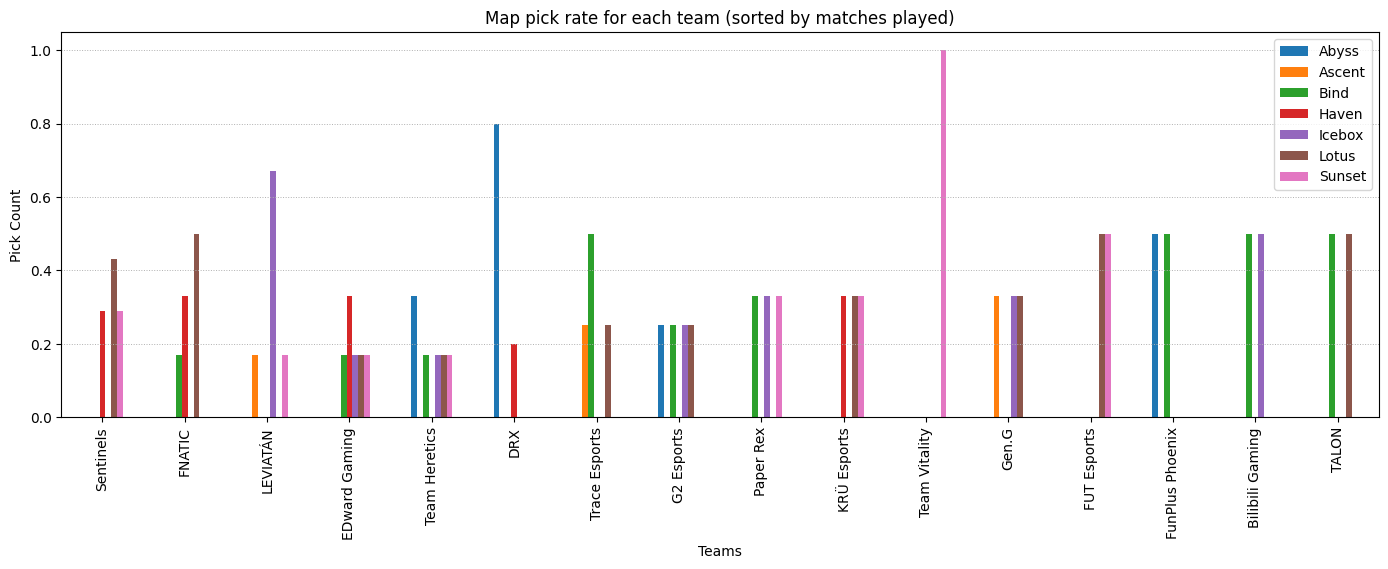

In [36]:
#visualize the pick rate of maps for each team
df_map_picks.plot(kind = 'bar', figsize = (17,5))
plt.title("Map pick rate for each team (sorted by matches played)")
plt.xlabel('Teams')
plt.ylabel('Pick Count')
plt.grid(axis = 'y', linestyle = ':', linewidth = 0.7)
plt.show()

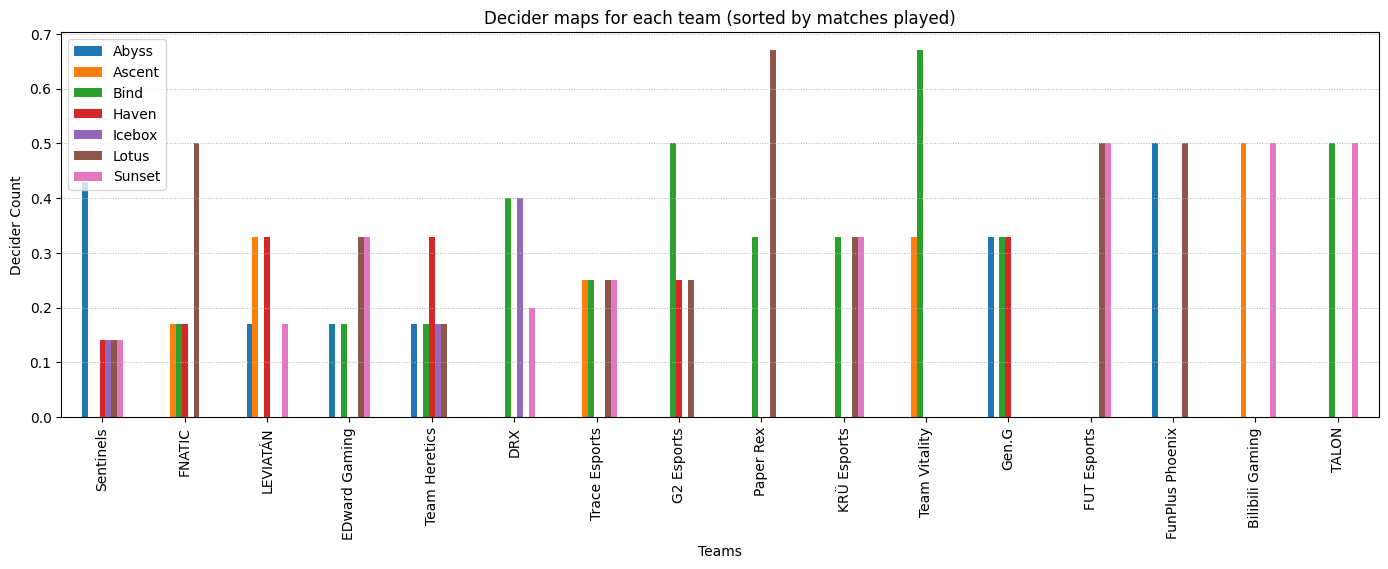

In [37]:
# visualize the decider rate of maps for each team
df_map_deciders.plot(kind = 'bar', figsize = (17,5))
plt.title("Decider maps for each team (sorted by matches played)")
plt.xlabel('Teams')
plt.ylabel('Decider Count')
plt.grid(axis = 'y', linestyle = ':', linewidth = 0.7)
plt.show()

In [38]:
matches_maps_df

,match_id,map_name,map_order,score,winner,duration,picked_by
0,378662,Haven,1,13 - 8,Gen.G,1:02:40,Sentinels
1,378662,Ascent,2,13 - 7,Gen.G,46:45,Gen.G
2,378663,Abyss,1,12 - 14,Team Heretics,1:10:12,FunPlus Phoenix
3,378663,Bind,2,13 - 9,FunPlus Phoenix,53:01,Team Heretics
4,378663,Lotus,3,13 - 15,Team Heretics,1:07:12,Decider
...,...,...,...,...,...,...,...
81,378829,Haven,1,6 - 13,Team Heretics,1:16:43,EDward Gaming
82,378829,Sunset,2,13 - 4,EDward Gaming,45:11,Team Heretics
83,378829,Lotus,3,13 - 9,EDward Gaming,55:30,EDward Gaming
84,378829,Bind,4,11 - 13,Team Heretics,1:01:45,Team Heretics


In [39]:
# Map Pick vs Win Rates
df_win_rates = matches_maps_df[['map_name', 'picked_by', 'winner']].copy()
df_win_rates['win_count'] = (df_win_rates['picked_by']== df_win_rates['winner']).astype(int)
df_win_rates = df_win_rates[df_win_rates['picked_by'] != 'Decider']
all_maps = df_win_rates['map_name'].unique()

df_win_rates_summary = df_win_rates.groupby('map_name').agg(
    total_picks = ('picked_by', 'count'),
    wins_by_picking_team = ('win_count', 'sum')
).reset_index()

In [40]:
df_win_rates

,map_name,picked_by,winner,win_count
0,Haven,Sentinels,Gen.G,0
1,Ascent,Gen.G,Gen.G,1
2,Abyss,FunPlus Phoenix,Team Heretics,0
3,Bind,Team Heretics,FunPlus Phoenix,0
5,Haven,KRÜ Esports,KRÜ Esports,1
...,...,...,...,...
80,Lotus,Team Heretics,Team Heretics,1
81,Haven,EDward Gaming,Team Heretics,0
82,Sunset,Team Heretics,EDward Gaming,0
83,Lotus,EDward Gaming,EDward Gaming,1


In [41]:
# Win rate for each map when picked
df_win_rates_summary['pick_rate'] = (df_win_rates_summary['total_picks']/df_win_rates_summary['total_picks'].sum() * 100).round(2)
df_win_rates_summary['win_rate'] = (df_win_rates_summary['wins_by_picking_team']/df_win_rates_summary['total_picks'] * 100).round(2)
df_win_rates_summary

,map_name,total_picks,wins_by_picking_team,pick_rate,win_rate
0,Abyss,9,6,12.50,66.67
1,Ascent,3,3,4.17,100.00
2,Bind,11,5,15.28,45.45
3,Haven,9,4,12.50,44.44
4,Icebox,11,5,15.28,45.45
5,Lotus,16,8,22.22,50.00
6,Sunset,13,9,18.06,69.23


In [42]:
df_win_rates_summary.sort_values( by = 'pick_rate', ascending = False, inplace = True)
df_win_rates_summary.drop(columns = ['total_picks', 'wins_by_picking_team'], inplace = True)#df_win_rates_summary.set_index(['map_name'], inplace = True)
df_win_rates_summary

,map_name,pick_rate,win_rate
5,Lotus,22.22,50.00
6,Sunset,18.06,69.23
2,Bind,15.28,45.45
4,Icebox,15.28,45.45
0,Abyss,12.50,66.67
3,Haven,12.50,44.44
1,Ascent,4.17,100.00


In [43]:
print(df_win_rates_summary.columns)

Index(['map_name', 'pick_rate', 'win_rate'], dtype='object')


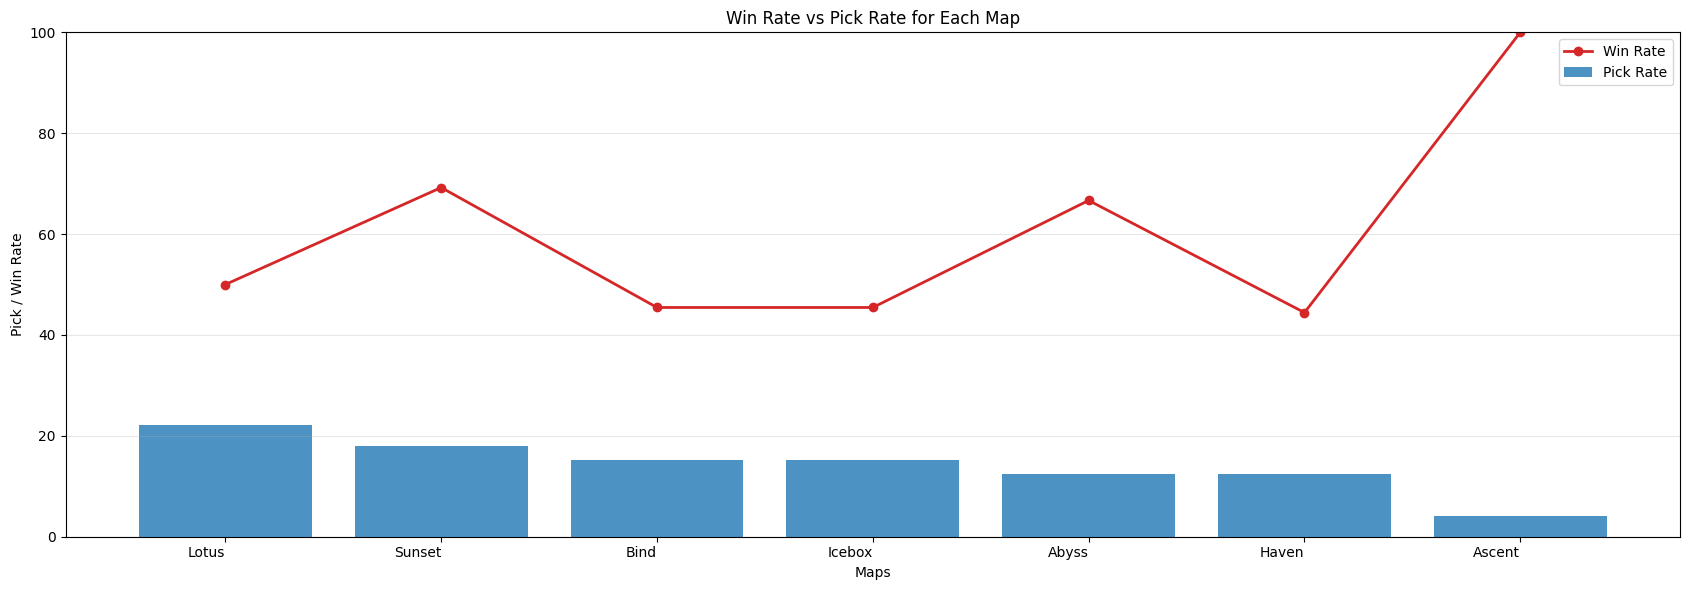

In [44]:
#df = df_win_rates_summary.sort_values("map_name")

maps = df_win_rates_summary['map_name']
x = np.arange(len(maps))

fig, ax = plt.subplots(figsize=(17, 6))

# Bar plot → Pick Rate
ax.bar(
    x,
    df_win_rates_summary["pick_rate"],
    alpha=0.8,
    label="Pick Rate",
    color="tab:blue"
)


# Line plot → Win Rate
ax.plot(
    x,
    df_win_rates_summary["win_rate"],
    color="tab:red",
    marker="o",
    linewidth=2,
    label="Win Rate"
)

# Axis formatting

ax.set_xticks(x)
ax.set_xticklabels(maps, ha="right")

ax.set_title("Win Rate vs Pick Rate for Each Map")
ax.set_xlabel("Maps")
ax.set_ylabel("Pick / Win Rate")
ax.set_ylim(0, 100)

ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

In [45]:
# Map win rate for each team on their map picks
# aagregate per team per map
team_map = (
    df_win_rates.groupby(["picked_by", "map_name"])
      .agg(
          picked_count=("map_name", "count"),
          wins_count=("win_count", "sum")
      )
      .reset_index()
      .rename(columns={
          "picked_by": "team",
          "map_name": "map"
      })
)
team_map

,team,map,picked_count,wins_count
0,Bilibili Gaming,Bind,1,0
1,Bilibili Gaming,Icebox,1,0
2,DRX,Abyss,4,4
3,DRX,Haven,1,0
4,EDward Gaming,Bind,1,1
5,EDward Gaming,Haven,3,0
6,EDward Gaming,Icebox,1,0
7,EDward Gaming,Lotus,2,2
8,EDward Gaming,Sunset,1,1
9,FNATIC,Bind,1,1


In [46]:
#
all_teams = team_map["team"].unique()

full_index = pd.MultiIndex.from_product(
    [all_teams, all_maps],
    names=["team", "map"]
)

team_map = (
    team_map
    .set_index(["team", "map"])
    .reindex(full_index, fill_value=0)
    .reset_index()
)

In [47]:
# total map picks per team and rank them by total picks

team_total_picks = (
    team_map.groupby("team")["picked_count"]
    .sum()
    .sort_values(ascending=False)
)

teams_sorted = team_total_picks.index.tolist()
n_teams = len(teams_sorted)

In [48]:
# calculate the pick rate and win rate for each map for each team
team_map["total_picks_team"] = team_map["team"].map(team_total_picks)

# Zero-safe pick rate
team_map["pick_rate"] = np.where(
    team_map["total_picks_team"] > 0,
    team_map["picked_count"] / team_map["total_picks_team"],
    0
)

# Zero-safe win rate
team_map["win_rate"] = np.where(
    team_map["picked_count"] > 0,
    team_map["wins_count"] / team_map["picked_count"],
    0
)

team_map

,team,map,picked_count,wins_count,total_picks_team,pick_rate,win_rate
0,Bilibili Gaming,Haven,0,0,2,0.00,0.0
1,Bilibili Gaming,Ascent,0,0,2,0.00,0.0
2,Bilibili Gaming,Abyss,0,0,2,0.00,0.0
3,Bilibili Gaming,Bind,1,0,2,0.50,0.0
4,Bilibili Gaming,Lotus,0,0,2,0.00,0.0
...,...,...,...,...,...,...,...
107,Trace Esports,Abyss,0,0,4,0.00,0.0
108,Trace Esports,Bind,2,1,4,0.50,0.5
109,Trace Esports,Lotus,1,0,4,0.25,0.0
110,Trace Esports,Sunset,0,0,4,0.00,0.0


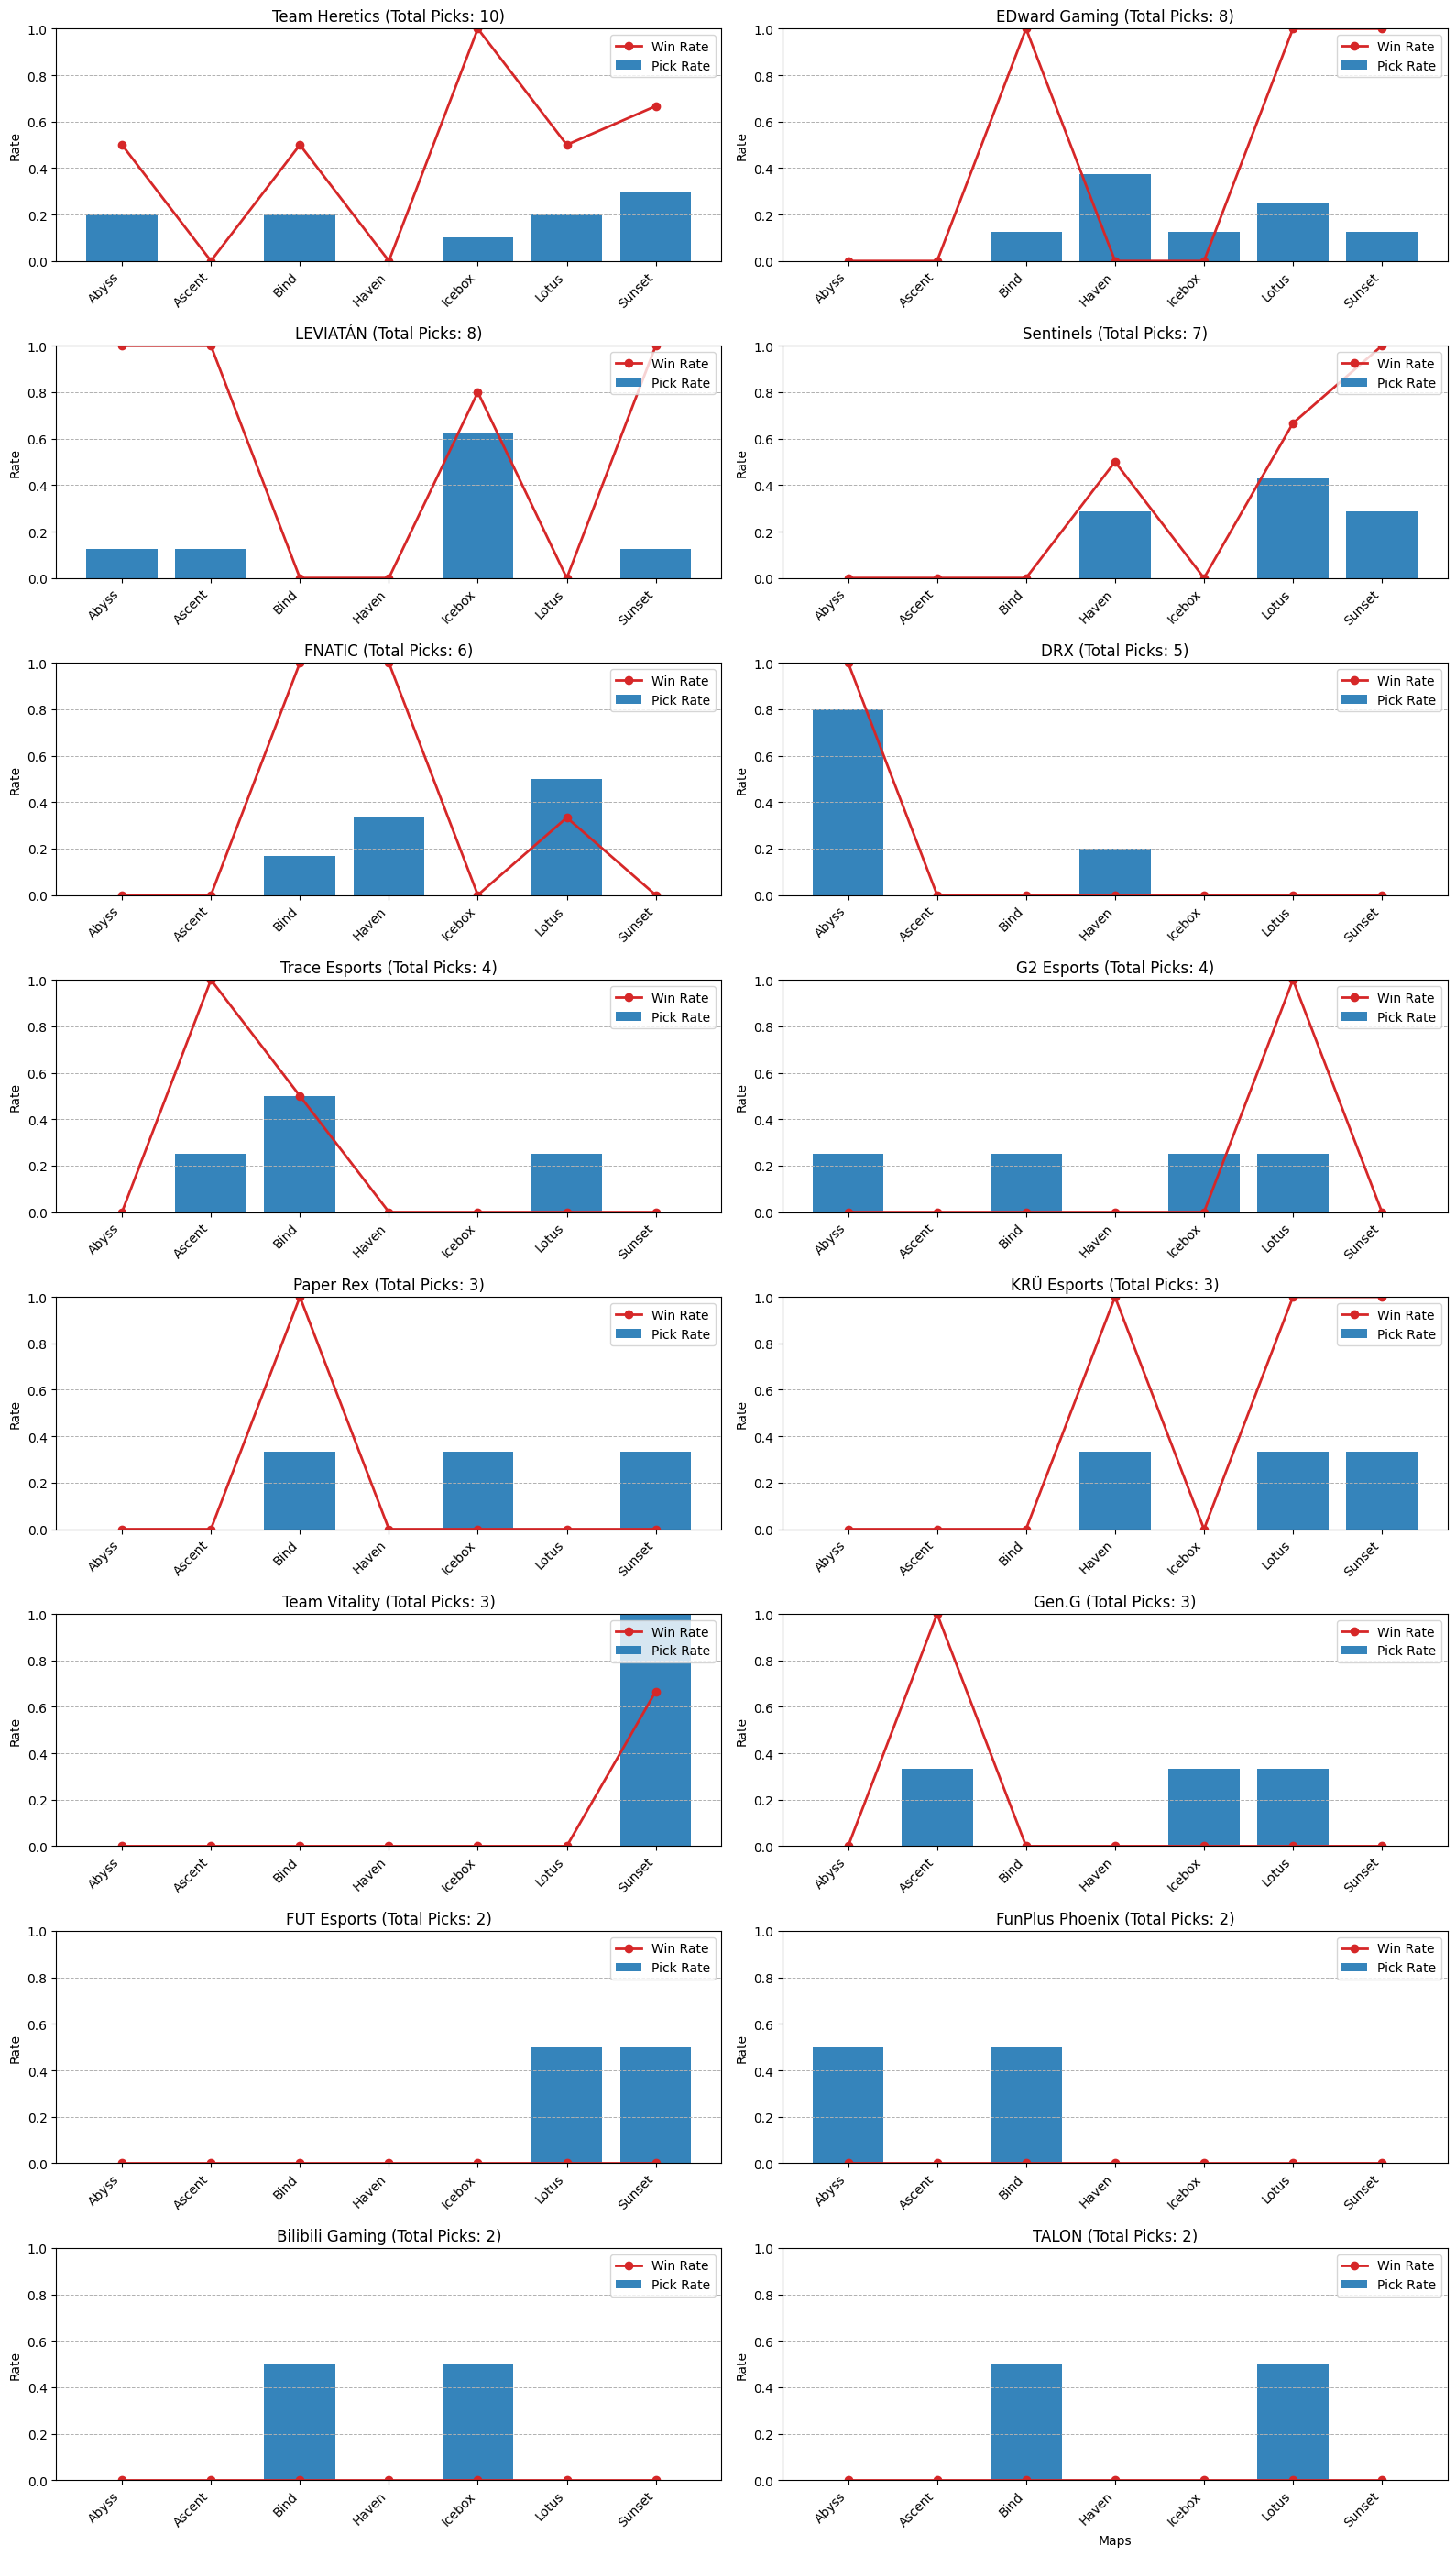

In [49]:
# calculate the total number of teams
ncols = 2
nrows = math.ceil(n_teams / ncols)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(16, 3.5 * nrows),
    sharex=False
)

axes = axes.flatten()

# plot for each team

for ax, team in zip(axes, teams_sorted):
    team_df = team_map[team_map["team"] == team]

    #Consistent map ordering across all teams
    team_df = team_df.sort_values("map")

    maps = team_df["map"]
    x = np.arange(len(maps))

    # Win rate bars
    ax.bar(
        x,
        team_df["pick_rate"],
        alpha=0.9,
        label="Pick Rate",
        color = 'tab:blue'
    )

    # Pick rate line
    ax.plot(
        x,
        team_df["win_rate"],
        marker="o",
        linewidth=2,
        label="Win Rate",
        color = 'tab:red'
    )

    ax.set_xticks(x)
    ax.set_xticklabels(maps, rotation=45, ha="right")
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle = '--', axis = 'y', linewidth = 0.7)
    ax.set_ylabel("Rate")
    ax.set_title(f"{team} (Total Picks: {team_total_picks[team]})")
    ax.legend(loc="upper right")

    for i in range(len(teams_sorted), len(axes)):
        fig.delaxes(axes[i])

plt.xlabel("Maps")
plt.tight_layout()
plt.show()

In [50]:
matches_maps_df

,match_id,map_name,map_order,score,winner,duration,picked_by
0,378662,Haven,1,13 - 8,Gen.G,1:02:40,Sentinels
1,378662,Ascent,2,13 - 7,Gen.G,46:45,Gen.G
2,378663,Abyss,1,12 - 14,Team Heretics,1:10:12,FunPlus Phoenix
3,378663,Bind,2,13 - 9,FunPlus Phoenix,53:01,Team Heretics
4,378663,Lotus,3,13 - 15,Team Heretics,1:07:12,Decider
...,...,...,...,...,...,...,...
81,378829,Haven,1,6 - 13,Team Heretics,1:16:43,EDward Gaming
82,378829,Sunset,2,13 - 4,EDward Gaming,45:11,Team Heretics
83,378829,Lotus,3,13 - 9,EDward Gaming,55:30,EDward Gaming
84,378829,Bind,4,11 - 13,Team Heretics,1:01:45,Team Heretics


In [51]:
# pick / win rate on decider maps
decider_maps = matches_maps_df[['match_id','map_name', 'picked_by','winner']].copy()
decider_maps = decider_maps[decider_maps['picked_by'] == 'Decider']
decider_maps = decider_maps.rename(columns = {'winner':'winning_team'})
# get the match_id, winner, looser from matches_overview_df

decider_maps = pd.merge(decider_maps, matches_overview_df[['match_id','winner', 'looser']], left_on = 'match_id', right_on= 'match_id', how = 'left')

decider_maps.drop(columns = ['picked_by','winning_team'], inplace = True)
decider_maps

,match_id,map_name,winner,looser
0,378663,Lotus,Team Heretics,FunPlus Phoenix
1,378657,Bind,DRX,KRÜ Esports
2,378669,Bind,Trace Esports,Team Vitality
3,378664,Bind,Team Heretics,Gen.G
4,378670,Ascent,Trace Esports,LEVIATÁN
5,378675,Bind,G2 Esports,EDward Gaming
6,378660,Lotus,FNATIC,KRÜ Esports
7,378677,Lotus,EDward Gaming,Paper Rex
8,378826,Sunset,EDward Gaming,Sentinels
9,378834,Lotus,Sentinels,FNATIC


In [52]:
decider_map_count = decider_maps['map_name'].copy()
decider_map_count= decider_map_count.value_counts()
decider_map_count

map_name
Lotus     4
Bind      4
Abyss     3
Ascent    1
Sunset    1
Icebox    1
Name: count, dtype: int64

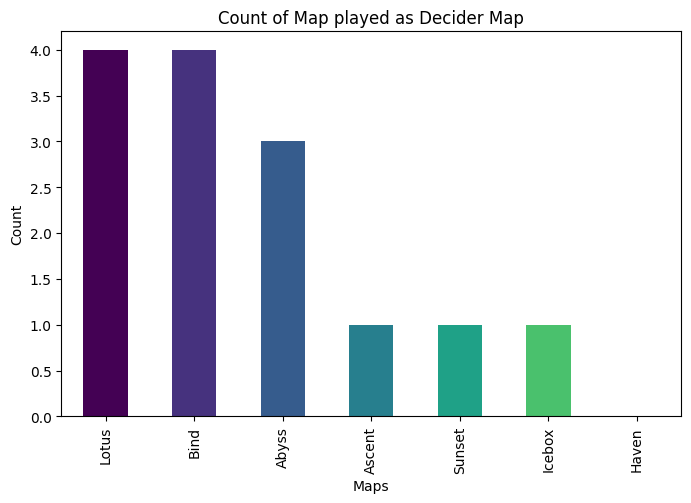

In [53]:
#Since Haven is not played on decide map, we will add it manually with count 0

decider_map_count['Haven'] = 0

# Choose gradient coloer based on index
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(decider_map_count)) for i in range (len(decider_map_count))]

#visualize the decider map count
decider_map_count.plot(kind = 'bar', figsize = (8, 5), color = colors)
plt.title("Count of Map played as Decider Map")
plt.ylabel('Count')
plt.xlabel("Maps")
plt.show()

In [54]:
# combine both the cols of winner and looser into one col  - team
decider_map_long = pd.melt(
    decider_maps,
    id_vars = ['match_id', 'map_name'],
    value_vars = ['winner','looser'],
    var_name = 'result_type',
    value_name = 'team'
)

# calculate win rate on decider maps
decider_map_long['win_count'] = np.where(decider_map_long['result_type'] == 'winner', 1, 0)
decider_map_long
decider_map_stats = decider_map_long.groupby(['team', 'map_name']).agg(
    wins = ('win_count','sum'),
    total = ('win_count', 'count')
).reset_index()

decider_map_stats['win_rate'] = (decider_map_stats['wins'] / decider_map_stats['total']) * 100
decider_map_stats

,team,map_name,wins,total,win_rate
0,DRX,Bind,1,1,100.0
1,DRX,Icebox,0,1,0.0
2,EDward Gaming,Abyss,2,2,100.0
3,EDward Gaming,Bind,0,1,0.0
4,EDward Gaming,Lotus,1,1,100.0
5,EDward Gaming,Sunset,1,1,100.0
6,FNATIC,Lotus,1,2,50.0
7,FunPlus Phoenix,Lotus,0,1,0.0
8,G2 Esports,Bind,1,1,100.0
9,Gen.G,Bind,0,1,0.0


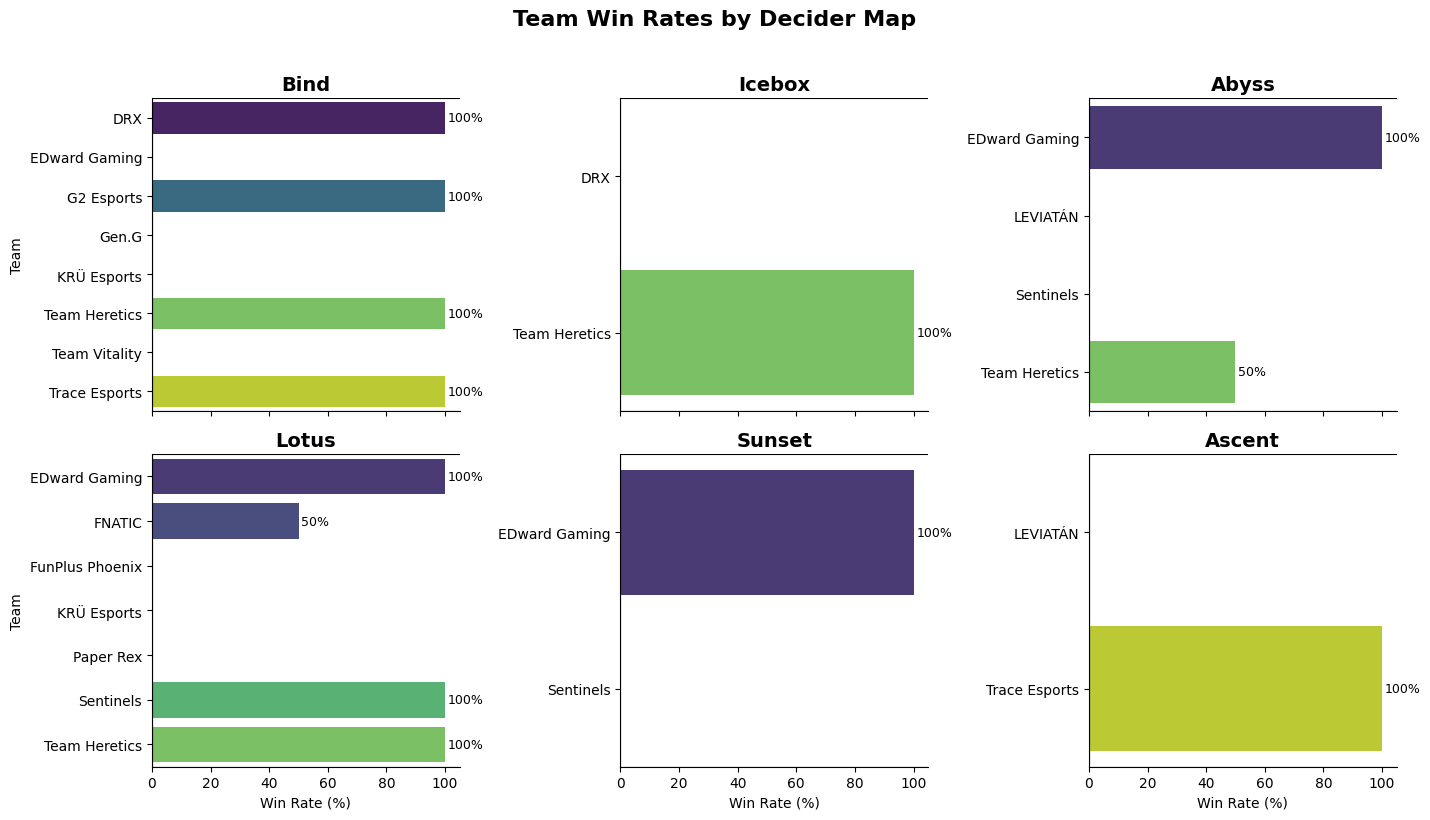

In [55]:
# winrate / pick rate on decider maps for each team

# Create the visualization

g = sns.catplot(
    data=decider_map_stats, 
    x='win_rate', 
    y='team', 
    col='map_name', 
    col_wrap=3,   # Number of graphs per row
    kind='bar', 
    height=4, 
    aspect=1.2,
    palette='viridis',
    hue = 'team',
    legend = False,
    sharey=False  # Allow different teams on y-axis for each map
)

# Customizing the layout
g.figure.suptitle('Team Win Rates by Decider Map', y=1.02, fontsize=16, fontweight = 'bold')
g.set_titles("{col_name}", weight = 'bold', size = 14)  # Title for each subplot is the Map Name
g.set_axis_labels("Win Rate (%)", "Team")

# Add text annotations for sample size (e.g., "1/1")
for ax in g.axes.flat:
    #adding lies / borders for each subplot
    ax.axvline(x = 0, color = 'black', linewidth = 0.8)
    ax.axhline(y = -0.5, color = 'black', linewidth = 0.8)
    ax.axhline(y = len(ax.patches)-0.5,color = 'black', linewidth = 0.8)
    

    # Iterate through the bars in each subplot
    for p in ax.patches:
        width = p.get_width()
        if width > 0: # Only label visible bars
            ax.text(width + 1, p.get_y() + p.get_height()/2, 
                    f'{int(width)}%', 
                    va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [56]:
matches_maps_df

,match_id,map_name,map_order,score,winner,duration,picked_by
0,378662,Haven,1,13 - 8,Gen.G,1:02:40,Sentinels
1,378662,Ascent,2,13 - 7,Gen.G,46:45,Gen.G
2,378663,Abyss,1,12 - 14,Team Heretics,1:10:12,FunPlus Phoenix
3,378663,Bind,2,13 - 9,FunPlus Phoenix,53:01,Team Heretics
4,378663,Lotus,3,13 - 15,Team Heretics,1:07:12,Decider
...,...,...,...,...,...,...,...
81,378829,Haven,1,6 - 13,Team Heretics,1:16:43,EDward Gaming
82,378829,Sunset,2,13 - 4,EDward Gaming,45:11,Team Heretics
83,378829,Lotus,3,13 - 9,EDward Gaming,55:30,EDward Gaming
84,378829,Bind,4,11 - 13,Team Heretics,1:01:45,Team Heretics


In [57]:
matches_overview_df

,match_id,format,maps_played,team1,team2,team1_score,team2_score,winner,looser,team1_ban1,team2_ban1,team1_pick1,team2_pick1,team1_ban2,team2_ban2,team1_pick2,team2_pick2,decider,series_category
0,378662,Bo3,2,Sentinels,Gen.G,2,0,Gen.G,Sentinels,Icebox,Sunset,Haven,Ascent,Bind,Lotus,Not Valid for Bo3,Not Valid for Bo3,Abyss,Bo3 (2 Maps)
1,378663,Bo3,3,FunPlus Phoenix,Team Heretics,1,2,Team Heretics,FunPlus Phoenix,Sunset,Icebox,Abyss,Bind,Ascent,Haven,Not Valid for Bo3,Not Valid for Bo3,Lotus,Bo3 (3 Maps)
2,378657,Bo3,3,KRÜ Esports,DRX,2,1,DRX,KRÜ Esports,Icebox,Lotus,Haven,Abyss,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind,Bo3 (3 Maps)
3,378656,Bo3,2,Bilibili Gaming,FNATIC,2,0,FNATIC,Bilibili Gaming,Haven,Sunset,Bind,Lotus,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Ascent,Bo3 (2 Maps)
4,378667,Bo3,2,TALON,LEVIATÁN,2,0,LEVIATÁN,TALON,Icebox,Lotus,Bind,Ascent,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Sunset,Bo3 (2 Maps)
5,378669,Bo3,3,Trace Esports,Team Vitality,1,2,Trace Esports,Team Vitality,Icebox,Lotus,Ascent,Sunset,Abyss,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind,Bo3 (3 Maps)
6,378674,Bo3,2,Paper Rex,G2 Esports,2,0,G2 Esports,Paper Rex,Ascent,Sunset,Icebox,Lotus,Haven,Abyss,Not Valid for Bo3,Not Valid for Bo3,Bind,Bo3 (2 Maps)
7,378673,Bo3,2,FUT Esports,EDward Gaming,2,0,EDward Gaming,FUT Esports,Haven,Ascent,Lotus,Bind,Abyss,Icebox,Not Valid for Bo3,Not Valid for Bo3,Sunset,Bo3 (2 Maps)
8,378664,Bo3,3,Team Heretics,Gen.G,1,2,Team Heretics,Gen.G,Ascent,Sunset,Abyss,Lotus,Icebox,Haven,Not Valid for Bo3,Not Valid for Bo3,Bind,Bo3 (3 Maps)
9,378658,Bo3,2,DRX,FNATIC,0,2,DRX,FNATIC,Haven,Icebox,Abyss,Lotus,Ascent,Sunset,Not Valid for Bo3,Not Valid for Bo3,Bind,Bo3 (2 Maps)


In [58]:
# Average round duration per map for all teams
rounds_df = matches_maps_df[['match_id','score', 'duration','map_name']].copy()
rounds_df = pd.merge(rounds_df, matches_overview_df[['match_id', 'team1', 'team2']], left_on = 'match_id', right_on = 'match_id', how = 'left')

# calculate total rounds and total duration
rounds_df['total_rounds'] = rounds_df['score'].str.split(' - ').apply(lambda x : int(x[0]) + int(x[1]))
rounds_df['total_duration'] = rounds_df['duration'].str.split(':').apply(lambda x : ((int(x[0]) * 3600) + (int(x[1]) * 60) + int(x[2]) - 480 ) if len(x)==3 else ((int(x[0]) * 60) + int(x[1]) - 480)) # reduced 480 secs for 3 timeouts and  a half time

#calculate the average duration per round
rounds_df['avg_dur'] = (rounds_df['total_duration'] / rounds_df['total_rounds']).round(2)
rounds_df

,match_id,score,duration,map_name,team1,team2,total_rounds,total_duration,avg_dur
0,378662,13 - 8,1:02:40,Haven,Sentinels,Gen.G,21,3280,156.19
1,378662,13 - 7,46:45,Ascent,Sentinels,Gen.G,20,2325,116.25
2,378663,12 - 14,1:10:12,Abyss,FunPlus Phoenix,Team Heretics,26,3732,143.54
3,378663,13 - 9,53:01,Bind,FunPlus Phoenix,Team Heretics,22,2701,122.77
4,378663,13 - 15,1:07:12,Lotus,FunPlus Phoenix,Team Heretics,28,3552,126.86
...,...,...,...,...,...,...,...,...,...
81,378829,6 - 13,1:16:43,Haven,EDward Gaming,Team Heretics,19,4123,217.00
82,378829,13 - 4,45:11,Sunset,EDward Gaming,Team Heretics,17,2231,131.24
83,378829,13 - 9,55:30,Lotus,EDward Gaming,Team Heretics,22,2850,129.55
84,378829,11 - 13,1:01:45,Bind,EDward Gaming,Team Heretics,24,3225,134.38


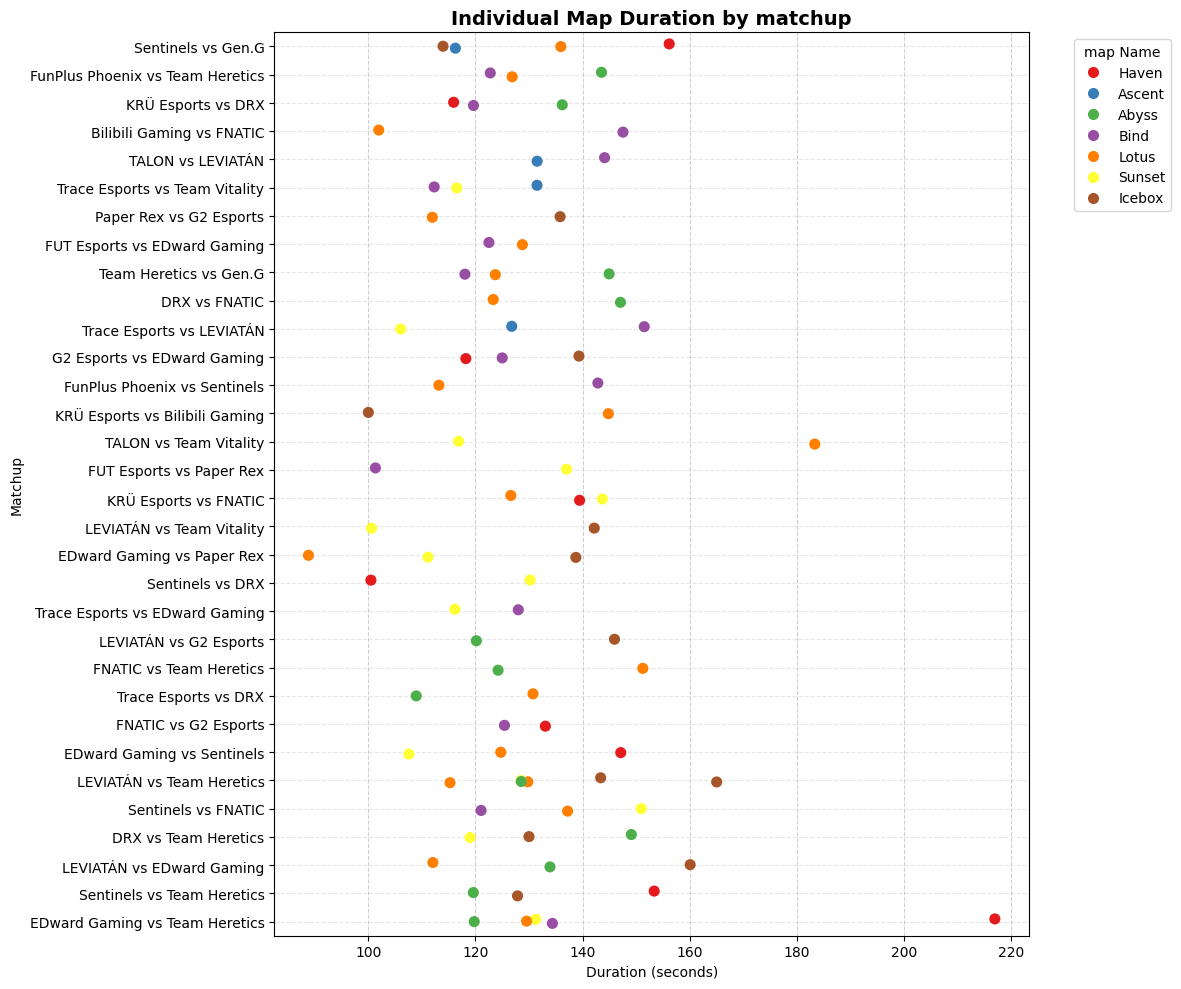

In [59]:
# visulaize the data with strippolt for average map duration
rounds_df['matchup'] = (rounds_df['team1']) + ' vs ' + (rounds_df['team2'])

plt.figure(figsize = (12,10))
sns.stripplot(
    data = rounds_df,
    x = 'avg_dur',
    y = 'matchup',
    hue = 'map_name',
    jitter = True,
    size = 8,
    alpha = 1,
    palette = 'Set1'
)

plt.title('Individual Map Duration by matchup', weight = 'bold', size = 14)
plt.xlabel('Duration (seconds)')
plt.ylabel('Matchup')
plt.legend(title = 'map Name', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.3)
plt.tight_layout()
plt.show()


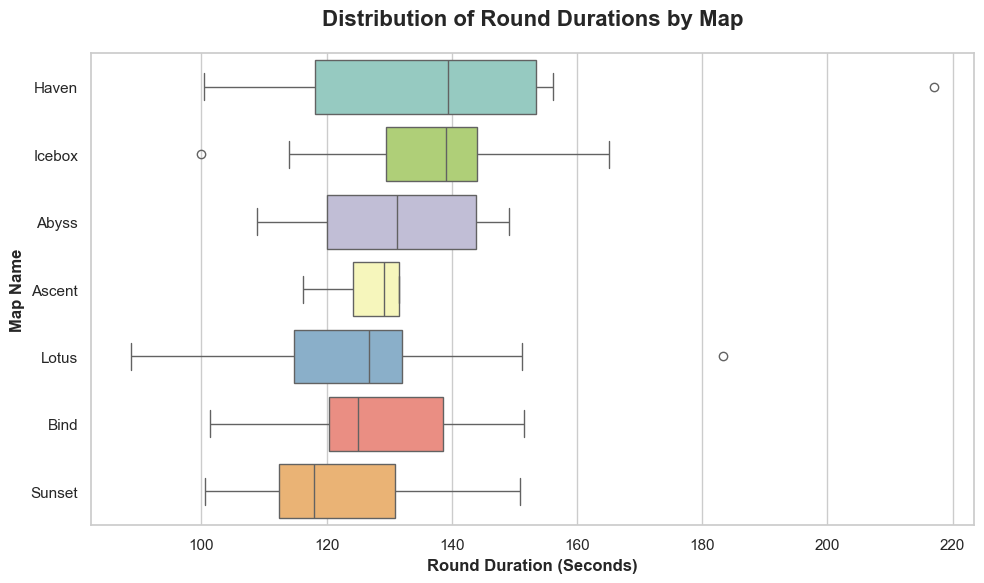

In [60]:
# which map tends to have longer rounds
sns.set_theme(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=rounds_df, 
    x='avg_dur', 
    y='map_name',
    hue ='map_name', 
    palette='Set3',
    # Sorting by median round duration
    order=rounds_df.groupby('map_name')['avg_dur'].median().sort_values(ascending=False).index)

# Add Titles and Labels
plt.title('Distribution of Round Durations by Map', weight='bold', size=16, pad=20)
plt.xlabel('Round Duration (Seconds)', weight='bold')
plt.ylabel('Map Name', weight='bold')

plt.tight_layout()
plt.show()

In [61]:
# load maps data (maps_stats.csv)
maps = pd.read_csv("VCT_2024_seoul_dataset/maps_stats.csv")
maps


,map_name,times_played,attack_win_percent,defense_win_percent
0,Lotus,20,55%,45%
1,Bind,15,54%,46%
2,Sunset,14,53%,47%
3,Abyss,12,51%,49%
4,Icebox,12,52%,48%
5,Haven,9,48%,52%
6,Ascent,4,47%,53%


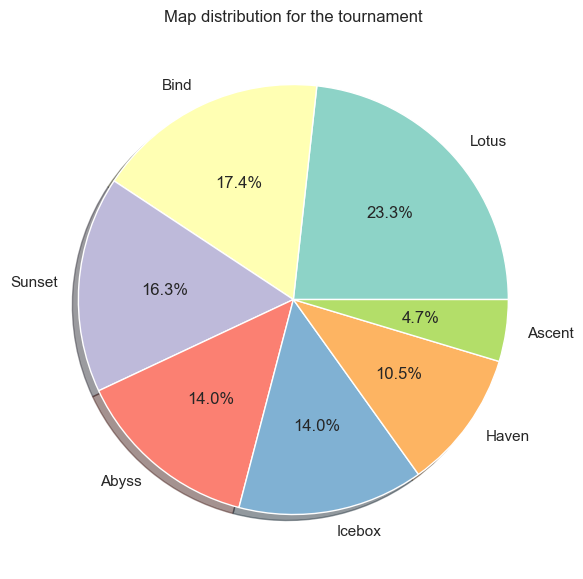

In [62]:
# Maps played distribution for the tournament
plt.figure(figsize = (6,6))
colors = plt.cm.Set3.colors

plt.pie(maps['times_played'],
        labels = maps['map_name'],
        autopct = '%1.1f%%',
        colors = colors, 
        shadow= True
)

plt.title('Map distribution for the tournament')
plt.axis('equal')
plt.tight_layout()
plt.show()

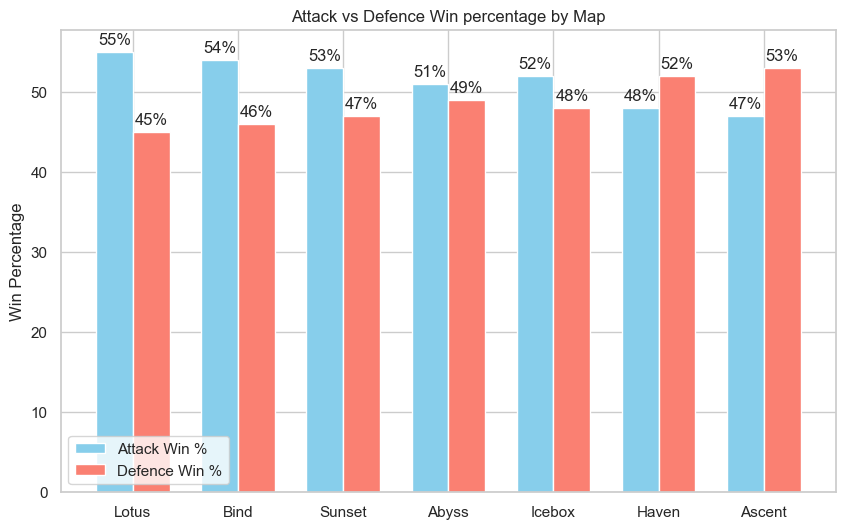

In [63]:
# Attack and Defence Win % distribution for each map
# Clean the columsn by removing the % sign and converts in float
maps['attack_win_percent'] = maps['attack_win_percent'].astype(str).str.strip('%').astype('float')
maps['defense_win_percent'] = maps['defense_win_percent'].astype(str).str.strip('%').astype('float')

# setup plot dimentions
x = np.arange(len(maps['map_name']))
width = 0.35

fig, ax = plt.subplots(figsize = (10,6)) # create figure and axes 
#  bars for Attack  & Defense Win %, shifted left/ right by half the width to prevent overlap
rects1 = ax.bar(x - width/2, maps['attack_win_percent'], width, label = 'Attack Win %', color = 'skyblue')
rects2 = ax.bar(x +width/2, maps['defense_win_percent'], width, label = 'Defence Win %', color = 'salmon')

# Add labels
ax.set_ylabel('Win Percentage')
ax.set_title('Attack vs Defence Win percentage by Map')
ax.set_xticks(x)
ax.set_xticklabels(maps['map_name'])
ax.legend()

# Define fucntion to add value labels at the top of the bars

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}%', xy = (rect.get_x() + rect.get_width()/2, height),
        xytext = (0,3), textcoords = 'offset points', ha = 'center',va = 'bottom')
# xy = (rect.get_x() + rect.get_width()/2, height) -> It places the label at the center-top of each bar 
# by using the bar’s midpoint on the x-axis and its height on the y-axis
# xytext=(0,3) → shifts the label 3 points above the bar
# ha='center' → horizontally centered
# va='bottom' → vertically aligned at the bottom of the text

autolabel(rects1)
autolabel(rects2)


plt.show()
